In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\ashwini mahajan\Downloads\mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# 1. Music

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

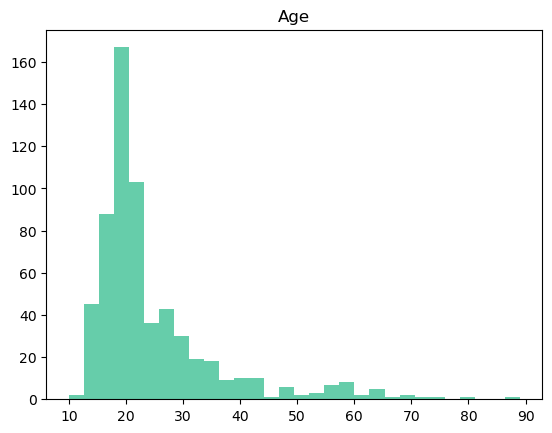

In [51]:
import numpy as np

df.hist(['Age'], bins=30, color='mediumaquamarine', grid=False)

Most respondents are in their late teens or early twenties. A single 89 year old respondent is an interesting outlier!

The age distribution makes sense, as the survey used to collect data was advertised in discussion forums and social media sites that target this demographic. This may introduce age bias, i.e. influencing which music genres are most popular

In [6]:
df['Age'].value_counts().loc[lambda x : x>50]

Age
18.0    85
19.0    61
17.0    59
21.0    52
Name: count, dtype: int64

In [7]:
df['Age'].max()

89.0

Most respondents are in their late teens or early twenties. A single 89 year old respondent is an interesting outlier!

The age distribution makes sense, as the survey used to collect data was advertised in discussion forums and social media sites that target this demographic. This may introduce age bias, i.e. influencing which music genres are most popular.

Text(0, 0.5, '')

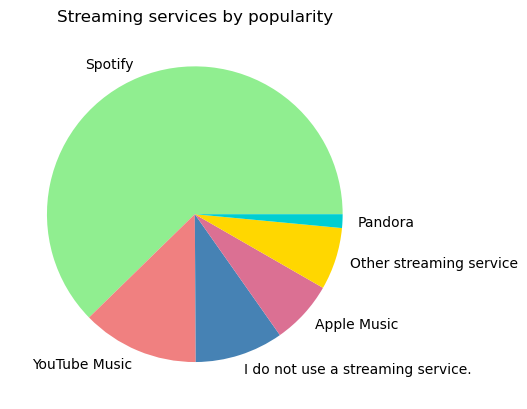

In [8]:
import matplotlib.pyplot as plt

s_colors = ['lightgreen', 'lightcoral', 'steelblue', 'palevioletred', 'gold', 'darkturquoise']

services = df['Primary streaming service'].value_counts()
services.plot(kind='pie', colors = s_colors)

plt.title('Streaming services by popularity')
plt.ylabel("")

In [9]:
df['Primary streaming service'].value_counts(normalize=True)

Primary streaming service
Spotify                              0.623129
YouTube Music                        0.127891
I do not use a streaming service.    0.096599
Apple Music                          0.069388
Other streaming service              0.068027
Pandora                              0.014966
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Streaming services by Age')

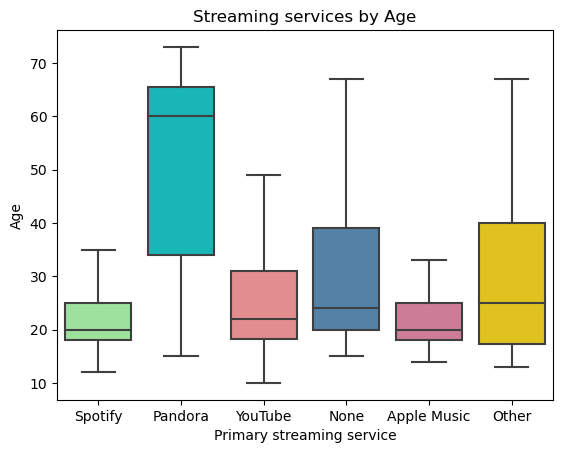

In [10]:
import seaborn as sns

s_colors2 = ['lightgreen', 'darkturquoise', 'lightcoral', 'steelblue', 'palevioletred', 'gold']

df.replace(['Other streaming service', 'I do not use a streaming service.', 'YouTube Music'],
                       ['Other', 'None', 'YouTube'], inplace=True)

bplot = sns.boxplot(data=df, x="Primary streaming service", y = "Age",
            showfliers = False,
            palette = s_colors2)

plt.title('Streaming services by Age')

In [11]:
s_df = df.groupby(['Primary streaming service'])
s_ages = []
s_ages.append(s_df['Age'].median())

s_ages

[Primary streaming service
 Apple Music    20.0
 None           24.0
 Other          25.0
 Pandora        60.0
 Spotify        20.0
 YouTube        22.0
 Name: Age, dtype: float64]

array([[<Axes: title={'center': 'Hours per day'}>]], dtype=object)

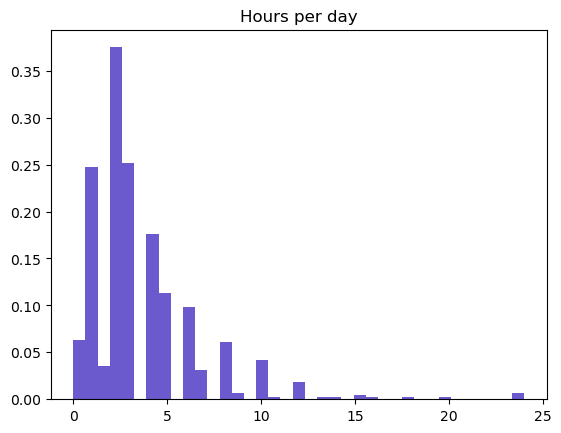

In [12]:
df.hist(['Hours per day'], bins='auto', density=True, color = 'slateblue', grid=False)

In [13]:
df['Hours per day'].value_counts().loc[lambda x : x>100]

Hours per day
2.0    173
3.0    120
1.0    117
Name: count, dtype: int64

The vast majority of respondents listen to music between 0-5 hours per day. After this threshold, the number of respondents that listen to music 5+ hours a day decreases almost exponentially. There are a few respondents that claim to listen to music 24 hours a day.

<Axes: ylabel='count'>

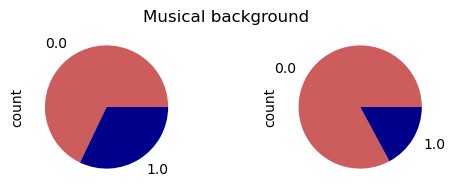

In [20]:
fig = plt.figure(figsize=(6,2))

plt.suptitle("Musical background")

ax = fig.add_subplot(121)

inst = df['Instrumentalist'].value_counts()
inst.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

ax = fig.add_subplot(122)

comp = df['Composer'].value_counts()
comp.plot(kind='pie', colors = ["indianred", "darkblue"], labeldistance = 1.2)

Most respondents do not play an instrument. It is even rarer for a respondent to compose music.

In [53]:
df.replace(['No', 'Yes'],
                       [0, 1], inplace=True)

C:\Users\ashwini mahajan\AppData\Local\Temp\ipykernel_5844\3766805788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['No', 'Yes'],


# 2. Mental Health

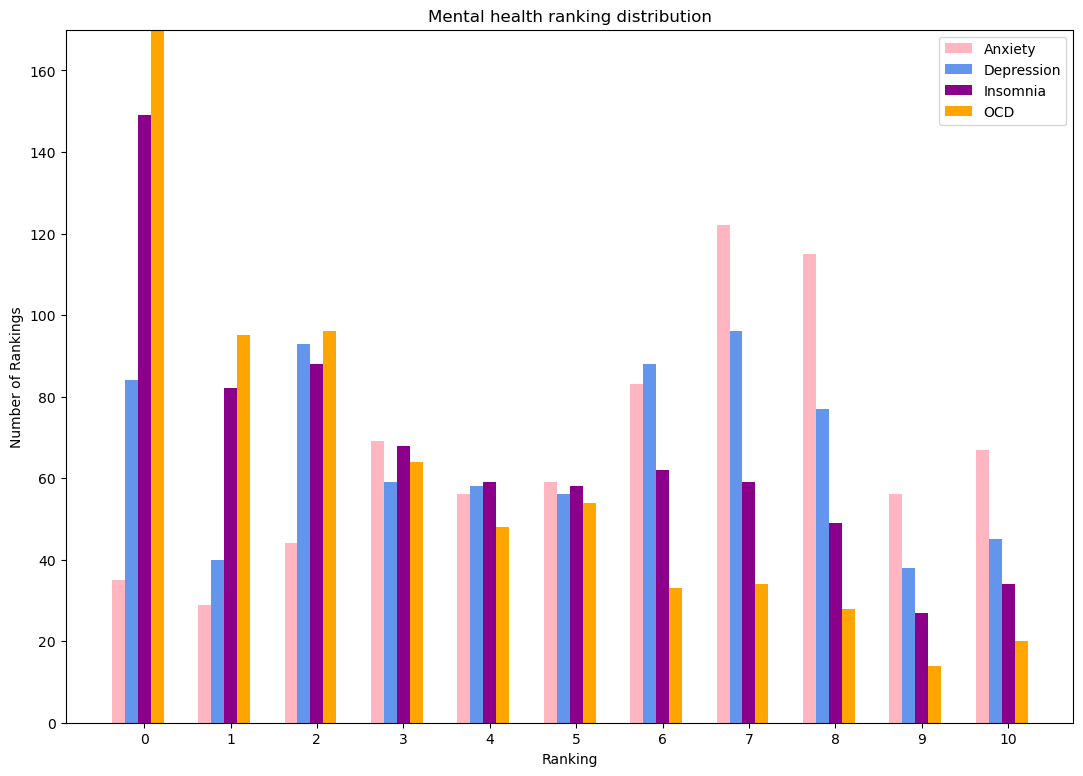

In [28]:
m_all = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_df = df[m_all]
mental_df.round(0).astype(int)

disorder_count = []
for disorder in m_all:
    x=0
    while x !=11:
        count =  (mental_df[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety", color = 'lightpink')
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression", color = 'cornflowerblue')
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia", color = 'darkmagenta')
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD", color = 'orange')

ax.set_ylim([0, 170])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()

plt.show()

In [29]:
# get value for number of OCD rankings at 0

max(disorder_count)

248

In [30]:
for disorder in m_all:
    d_avg = str(round(df[disorder].mean(), 2))
    print(disorder + ' average: ' + d_avg)

Anxiety average: 5.84
Depression average: 4.8
Insomnia average: 3.74
OCD average: 2.64


Elevated rankings for depression and anxiety are very common, averaging rankings of 5 and 6 respectively. Between each ranking, popularity also seems to move in the same direction (i.e., from rankings 1 to 2, the popularity of these rankings increases for both anxiety and depression.) Interestingly (albeit concerningly), a given individual is more likely to rank depression at 10 than 0.

Insomnia is somewhat common and distributed more fairly outside of the 0 ranking. However, insomnia rankings do demonstrate a downward trend in popularity as the rankings increase.

With 0 as its mode, OCD is the least common disorder. Similarly to the insomnia rankings, as OCD rankings increase, they tend to decrease in popularity.

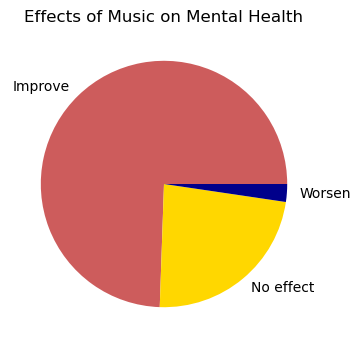

In [32]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = df['Music effects'].value_counts()
effects.plot(kind='pie', colors = ["indianred", "gold", "darkblue"], ylabel= '');

In [33]:
effects

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

The majority of respondents find that music has a positive impact on their mental health. Of the remaining respondents, only 15 individuals reported music having a negative impact.

# Music Genres

Text(0, 0.5, '')

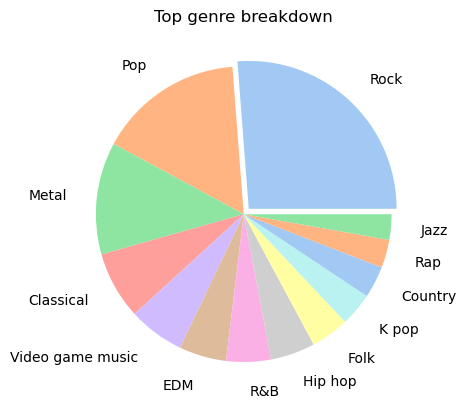

In [34]:
genre = df["Fav genre"].value_counts().loc[lambda x: x>10]
genre.plot(kind='pie', labeldistance = 1.2, 
            explode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,], 
            colors = sns.color_palette('pastel')[0:13])

plt.title('Top genre breakdown')
plt.ylabel("")

Rock is the most popular genre, being selected as an individual's favorite genre 1 out of 4 times. In terms of popularity, rock is followed by pop and metal. Lofi, Gospel, and Latin music were selected less than 0.14% of the time and do not appear in the above pi chart.

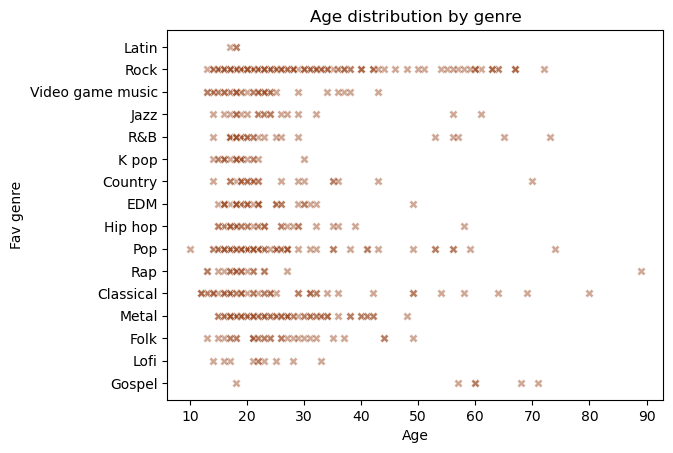

In [35]:
# age and genre

sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.5, marker = "X", color = "sienna")
plt.title('Age distribution by genre');

Rock has the most diverse range of ages. Classical and Pop listeners also have a wider range of ages compared to other genres. Some music genres, such as K pop and Lofi appear to attract a more specific and younger age group.

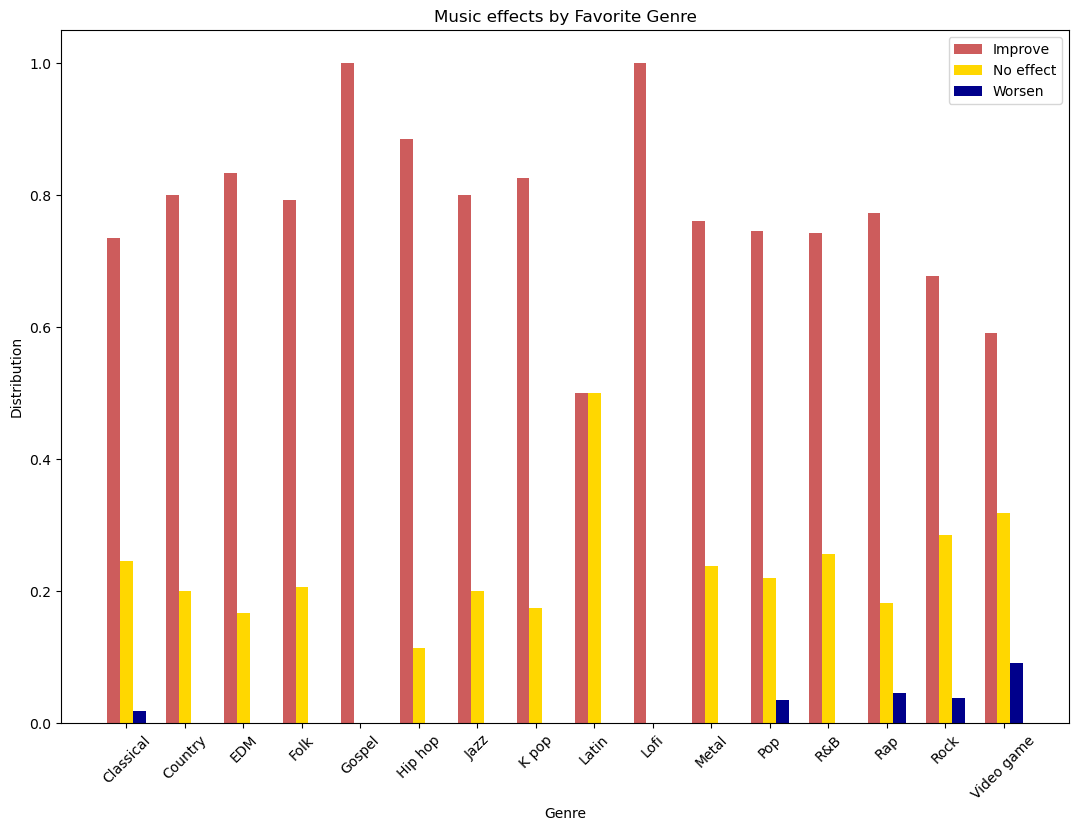

In [36]:
df.replace(['Video game music'],
                       ['Video game'], inplace=True)

g_all = df['Fav genre'].unique()
g_all.sort()
fg_df = df.groupby(['Fav genre'])
fg_dist = fg_df['Music effects'].value_counts(ascending=False, normalize=True).tolist()

insert_indices = [5, 8, 11, 13, 14, 17, 20, 23, 26, 28, 29, 32, 38]
for i in range(len(insert_indices)):
    fg_dist.insert(insert_indices[i], 0)

imp_dist = fg_dist[0::3]
no_eff_dist = fg_dist[1::3]
wors_dist = fg_dist[2::3]

width = 0.22

x = np.arange(len(g_all))

fig, ax = plt.subplots(figsize=(13, 9))

b1 = ax.bar(x-width, imp_dist, width, label="Improve", color = 'indianred')
b2 = ax.bar(x, no_eff_dist, width, label="No effect", color = 'gold')
b3 = ax.bar(x+width, wors_dist, width, label="Worsen", color = 'darkblue')

plt.title("Music effects by Favorite Genre")
ax.set_ylabel('Distribution')
ax.set_xlabel('Genre')
ax.set_xticks(x, g_all, rotation = 45)
ax.legend()

plt.show()

Regardless of genre, the vast majority of respondents agree that music has a positive impact on mental health. This is corroborated by the "Effects of Music on Mental Health" figure.

Individuals who selected Gospel and Lofi as their favorite genre unanimously find music beneficial.

Individuals who selected Video Game Music as their favorite genre have the most diverse distribution of responses. Roughly 40% of these respondents did not find music beneficial at all, with 10% of respondents reporting a negative impact on their mental health.

The only other respondents that found music detrimental were respondents who selected Classical, Pop, Rap, or Rock music as their top genre.

# BPM

In [37]:
print(df['BPM'].max())
print(df['BPM'].min())

999999999.0
0.0


In [38]:
# filter out noise by creating upper and lower bounds

df = df[(df.BPM < 500) & (df.BPM > 20)]
print(df['BPM'].max())
print(df['BPM'].min())

220.0
40.0


C:\Users\ashwini mahajan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


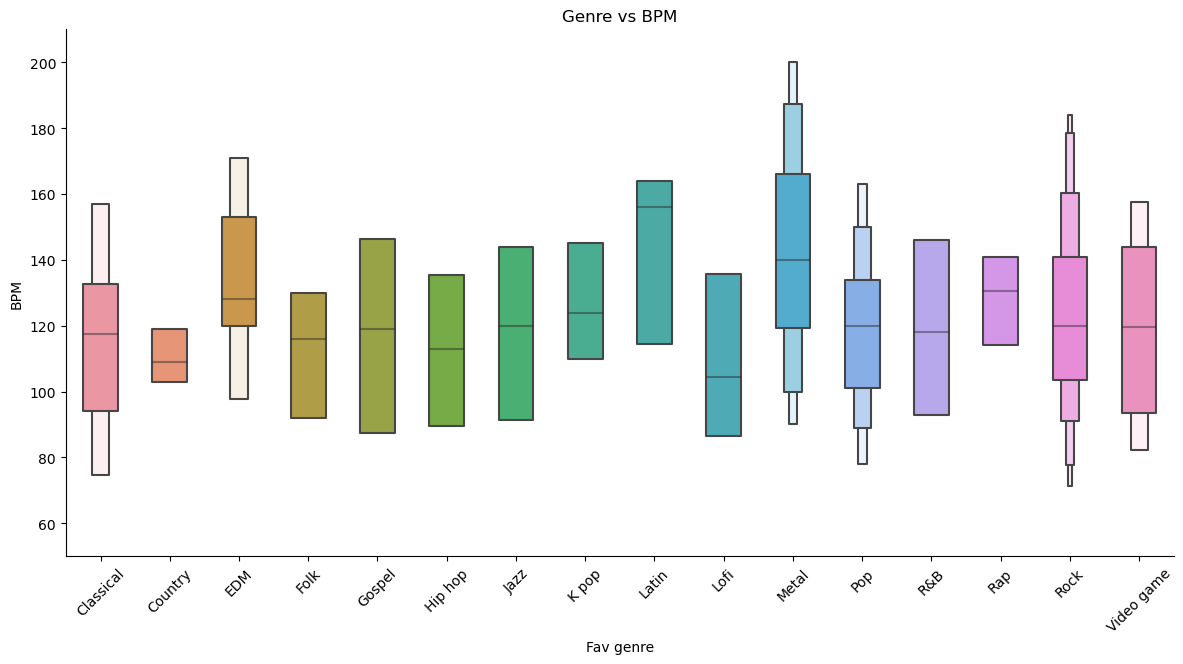

In [39]:
sns.catplot(
    data=df.sort_values("Fav genre"),
    x="Fav genre", y="BPM", kind="boxen",
    height=6, aspect=2,
    width = 0.5,
    showfliers=False,
)

plt.xticks(rotation = 45)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

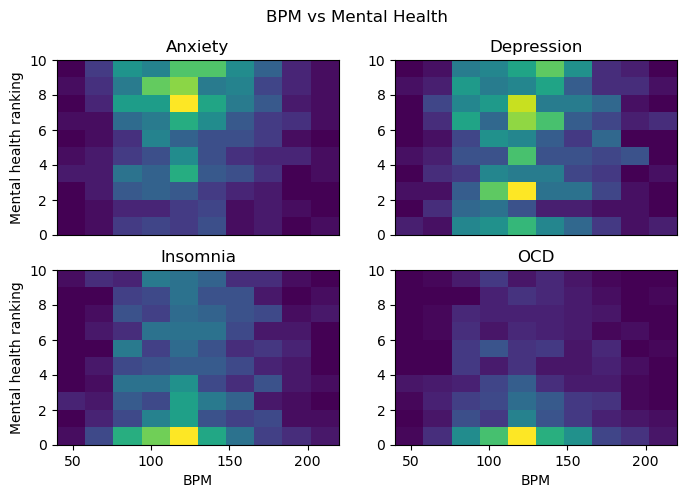

In [40]:
fig = plt.figure(figsize=(8, 5))

plt.suptitle("BPM vs Mental Health")

y = df["Anxiety"]
y2 = df["Depression"]
y3 = df["Insomnia"]
y4 = df["OCD"]
x = df["BPM"]

ax = fig.add_subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x,y, density = True);


ax = fig.add_subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x,y2, density = True);

ax = fig.add_subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x,y3, density = True);

ax = fig.add_subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x,y4, density = True);

# Genres

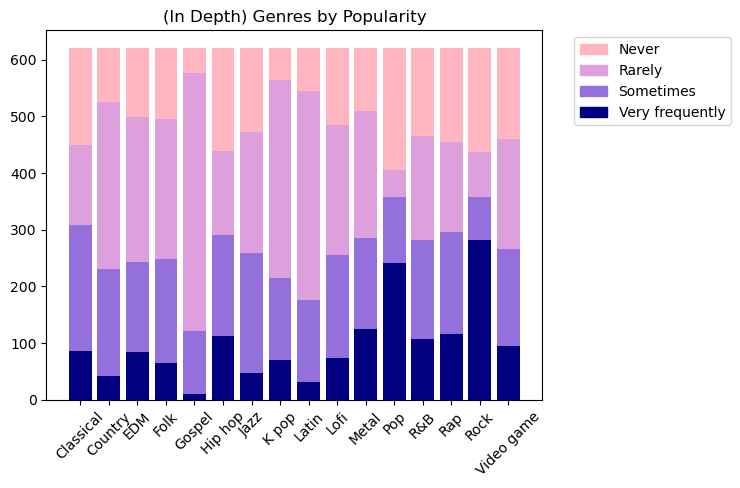

In [41]:
import matplotlib.patches as mpatches

i = 11

r_dist = []
s_dist = []
n_dist = []
vf_dist = []

while i != 27:
    freq_dist = df.iloc[:, i].value_counts().sort_index(ascending=True).tolist()
    r_dist.append(freq_dist[0])
    s_dist.append(freq_dist[1])
    n_dist.append(freq_dist[2])
    vf_dist.append(freq_dist[3])  
    
    i+=1

fig, ax = plt.subplots()

for i in range (0, 16):
    ax.bar(i, r_dist[i], label='Rare', bottom = vf_dist[i] + s_dist[i], color = "plum")
    ax.bar(i, s_dist[i], label='Sometimes', bottom = vf_dist[i], color = "mediumpurple")
    ax.bar(i, n_dist[i], label='Never', bottom=vf_dist[i] + s_dist[i] + r_dist[i], color = "lightpink")
    ax.bar(i, vf_dist[i], label='Very frequently', color = "navy")

ax.set_title('(In Depth) Genres by Popularity')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
ax.set_xticklabels(g_all)
plt.xticks(rotation = 45)

patch1 = mpatches.Patch(color='lightpink', label='Never')
patch2 = mpatches.Patch(color='plum', label='Rarely')
patch3 = mpatches.Patch(color='mediumpurple', label='Sometimes')
patch4 = mpatches.Patch(color='navy', label='Very frequently')

plt.legend(handles=[patch1, patch2, patch3, patch4], bbox_to_anchor=(1.05, 1.0), loc='upper left');

In [42]:
import itertools

med_list = []
med_list2 = []
med_list3 = []
med_list4 = []

df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],
                        [0, 1, 2, 3], inplace=True)

for i in range (11, 27):
    freq_genre = df.columns[i]
    med_list.append(pd.pivot_table(df, values='Anxiety', index=freq_genre, aggfunc="median").values.tolist())
    med_list2.append(pd.pivot_table(df, values='Depression', index=freq_genre, aggfunc="median").values.tolist())
    med_list3.append(pd.pivot_table(df, values='Insomnia', index=freq_genre, aggfunc="median").values.tolist())
    med_list4.append(pd.pivot_table(df, values='OCD', index=freq_genre, aggfunc="median").values.tolist())

def m_vs_gfreq(mlist, fig_name, bd1, bd2):

    r_dist = []
    s_dist = []
    n_dist = []
    vf_dist = []

    for i in range (0, 16):
        n_dist.append(mlist[i][0])
        r_dist.append(mlist[i][1])  
        s_dist.append(mlist[i][2])  
        vf_dist.append(mlist[i][3])  

    labels = g_all
    x = np.arange(len(labels))
    width = 0.15

    fig, ax = plt.subplots(figsize=(10, 4))

    b1 = ax.bar(x-2*width, list(itertools.chain(*n_dist)), width, label="Never", color = 'lightpink')
    b2 = ax.bar(x-width, list(itertools.chain(*r_dist)), width, label="Rarely", color = 'plum')
    b3 = ax.bar(x, list(itertools.chain(*s_dist)), width, label="Sometimes", color = 'mediumpurple')
    b4 = ax.bar(x+width, list(itertools.chain(*vf_dist)), width, label="Very Frequently", color = 'navy')

    ax.set_ylim(bd1, bd2)
    ax.set_ylabel('Ranking')
    ax.set_title(fig_name)
    ax.set_xticks(x, labels)
    ax.legend(loc='upper left')

    plt.xticks(rotation = 45)
    plt.show()

C:\Users\ashwini mahajan\AppData\Local\Temp\ipykernel_5844\2484853109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['Never', 'Rarely', 'Sometimes', 'Very frequently'],


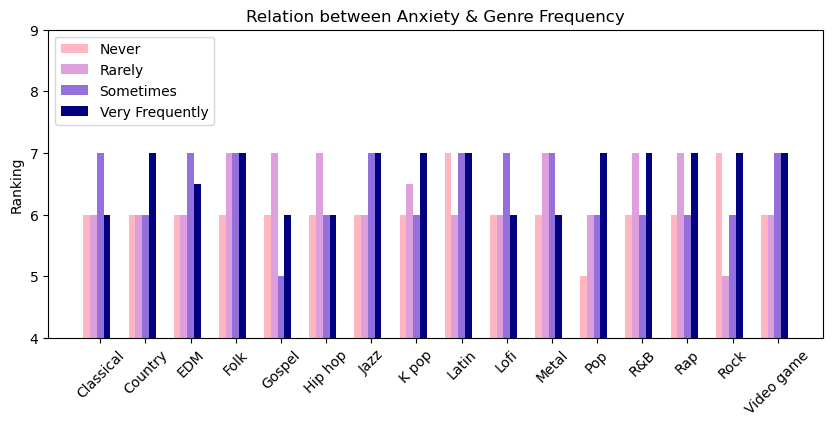

In [43]:
m_vs_gfreq(med_list, 'Relation between Anxiety & Genre Frequency', 4, 9)

C:\Users\ashwini mahajan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


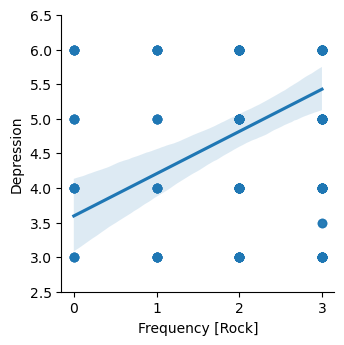

In [44]:
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = df, height=3.5)
fig.set(ylim=(2.5, 6.5))

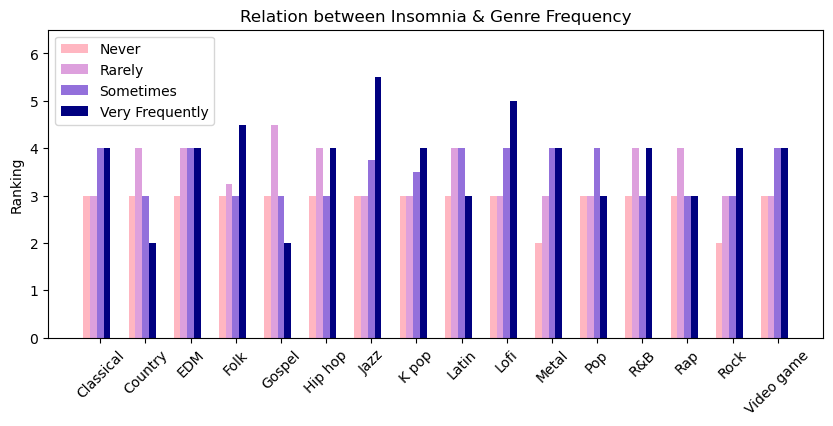

In [45]:
m_vs_gfreq(med_list3, 'Relation between Insomnia & Genre Frequency', 0, 6.5)

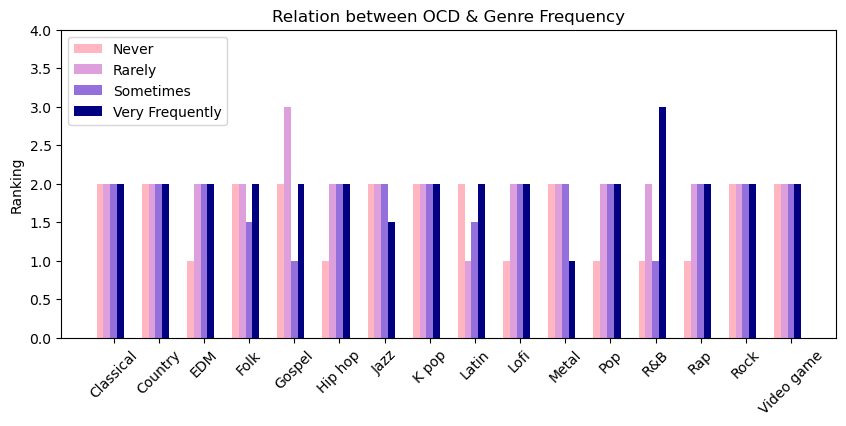

In [46]:
m_vs_gfreq(med_list4, 'Relation between OCD & Genre Frequency', 0,4)